Clean file: Rename headings, convert numbers to numbers, get rid of wrong types in columns, delete totally empty or uneeded columns

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
from matplotlib import cm

### From excel, save the csv to utf-8 then import, make sure col headings are good too

In [3]:
df = pd.read_csv('bookData.csv')
# check the data frame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cataloger         1014 non-null   object
 1   bookid            1014 non-null   object
 2   count             1014 non-null   int64 
 3   title             1014 non-null   object
 4   author            998 non-null    object
 5   combinedName      980 non-null    object
 6   authorOfColor     1014 non-null   int64 
 7   nonPersonAuthor   1014 non-null   int64 
 8   yrpub             1014 non-null   object
 9   neighborhood      1014 non-null   object
 10  collection        1014 non-null   object
 11  age               1014 non-null   object
 12  type              1014 non-null   object
 13  category1         1014 non-null   object
 14  category2         1014 non-null   object
 15  publication       990 non-null    object
 16  media             990 non-null    object
 17  summary       

In [4]:
#Convert Date to Number after removing the question marks (making them NaN)
df['yrpub'] = df['yrpub'].replace('?',None)
df['yrpub']=df['yrpub'].astype(int)
df.yrpub.unique()

array([2004, 1984, 2012, 1967, 1970, 1964, 2000, 2005, 1998, 1995, 1975,
       1983, 1989, 2014, 2008, 1968, 2007, 1994, 2006, 1977, 1993, 1958,
       2011, 2003, 2018, 1991, 2019, 1992, 1990, 2009, 1988, 2017, 2010,
       1996, 2013, 1997, 1986, 1999, 2015, 2002, 1981, 1962, 1987, 2001,
       1985, 1974, 1960, 1946, 1950, 1928, 1979, 1982, 1978, 1980, 1963,
       2016, 1976, 1969, 1966, 1954, 1961, 1973, 1949, 1971, 1937, 1972,
       1965, 1959])

###  Group the categorical and numeric columns

In [5]:
numerical = [
  'yrpub','count','authorOfColor','nonPersonAuthor'
]
categorical = [
  'neighborhood','collection','type','age','category1','category2','languages','originalLang'
]

bks = df[numerical + categorical]
bks.shape

(1014, 12)

In [6]:
bks['collection'].head()

0         Montlake5
1        Northgate3
2        Northgate3
3    Phinney-Green2
4    Phinney-Green3
Name: collection, dtype: object

In [7]:
bks.yrpub.max()

2019

(1900.0, 2020.0)

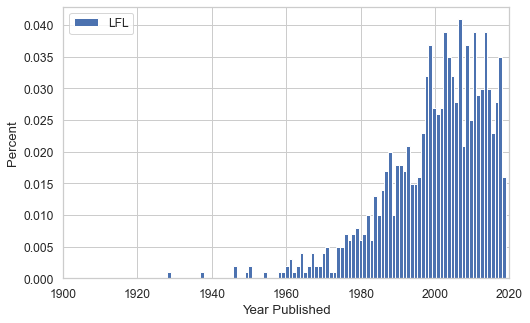

In [8]:
#'Density' Histogram of year published using mtlabplot
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    bks['yrpub'], norm_hist=True, kde=False, bins=92, hist_kws={"alpha": 1}
).set(xlabel='Year Published', ylabel='Percent')

plt.legend(labels=['LFL'])
#plt.legend('ABCDEF', ncol=2, loc='upper left')

plt.xlim(1900, 2020)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Year Published')]

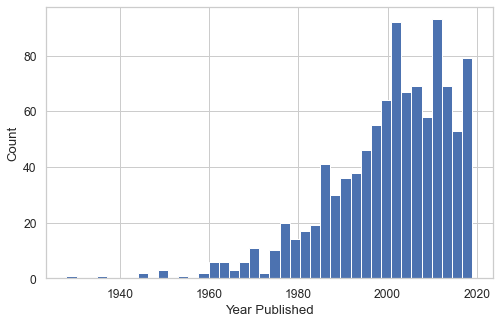

In [8]:
#Histogram of year published using mtlabplot
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    bks['yrpub'], norm_hist=False, kde=False, bins=40, hist_kws={"alpha": 1}).set(xlabel='Year Published', ylabel='Count')


In [9]:
#export csv for use with SPL data in Get-SPL-data-by-hood ipynb file: 
bks.to_csv('LFL-books-years.csv', mode = 'w', index=False)

# Start Analysis

In [2]:
#Skip if you are running the whole script from the start 
#Open LFL cleaned above data and the stat dataset.  These are combined in various ways below.

bks = pd.read_csv('LFL-books-years.csv',encoding='utf-8')
bksctstat = pd.read_csv('bkstats.csv',encoding='utf-8')
bks.head()

,yrpub,count,authorOfColor,nonPersonAuthor,neighborhood,collection,type,age,category1,category2,languages,originalLang
0,2004,1,0,1,Montlake,Montlake5,Nonfiction,Adult,Self Help/Health,Null,English,English
1,1984,1,0,1,Northgate,Northgate3,Nonfiction,Adult,Crafts,Null,English,English
2,2012,1,0,0,Northgate,Northgate3,Fiction,Childrens,Null,Null,English,English
3,1967,1,0,0,Phinney-Greenwood,Phinney-Green2,Nonfiction,Adult,Self Help/Health,Null,English,NaN
4,1984,1,0,0,Phinney-Greenwood,Phinney-Green3,Nonfiction,Adult,History,Null,English,English


## Year Published

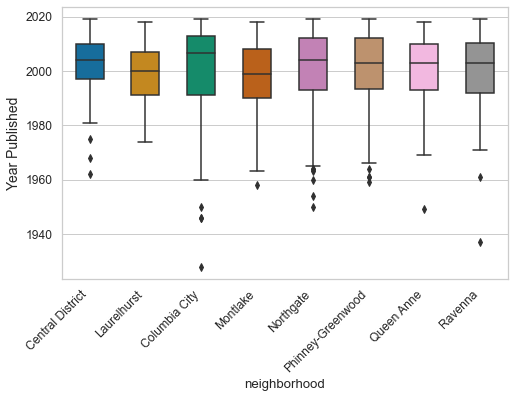

In [10]:
#Plots using Seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

bplot = sns.boxplot(y='yrpub', x='neighborhood', data=bks,
                 width=0.5,
                 palette="colorblind")

# add stripplot to boxplot with Seaborn
#bplot=sns.stripplot(y='yrpub', x='neighborhood', data=bks, 
#                   jitter=True, 
#                   marker='o', 
#                   alpha=0.5,
#                   color='black')

#Set y axis label

bplot.set_ylabel("Year Published",
                fontsize=14)

#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right') #This sets horizontal alignment

### Age Groups

Text(0, 0.5, 'number of books')

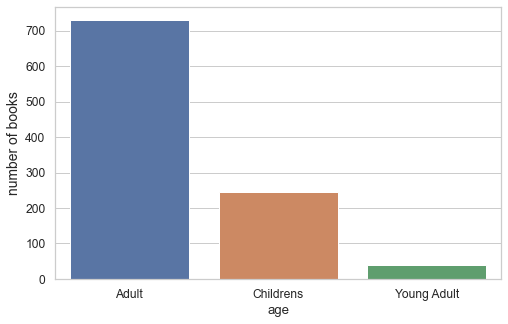

In [11]:
#uses matlibplot to count rows for each type and plot
#agedf = df.age.value_counts().plot(kind='pie') 
#plt.axis('equal')
#plt.title('Number of appearances in dataset')

#Using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
plot = sns.countplot(bks['age']);
plot.set_ylabel("number of books",
                fontsize=14)

### Could chart all the categorical variables at once- but why?

In [24]:
#fig, ax = plt.subplots(2, 4, figsize=(20, 10))
#for variable, subplot in zip(categorical, ax.flatten()):
#    sns.countplot(bks[variable], ax=subplot)
#    for label in subplot.get_xticklabels():
#        label.set_rotation(90)
#bks.info()

### LFL grouped datasets

### Fiction by neighborhood


In [12]:
#Set up the Dataframe

#Groups count by Neighborhood, collection, and type (fiction or non fiction), calculate percent
bksfiction = bks.groupby(['neighborhood','collection', 'type'])['count'].sum().reset_index()
bksfiction['total'] = bksfiction.groupby('collection')['count'].transform('sum')
bksfiction['percent'] = bksfiction['count']/bksfiction['total']


#Select fiction
fic = bksfiction.loc[bksfiction['type']=='Fiction'].copy() #adding the .copy() gets rid of the settingwithcopywarning

#Sort and reindex so that the chart goes low to hight
fic['median'] = fic.groupby('neighborhood')['percent'].transform('median')
fic = fic.sort_values(by=['median'], ascending=True).reset_index()


In [13]:
#Open SPL fiction dataframe from the Get-SPL-Book-Data-by-hood jupyter file
#Add a laurelhurst row since it is missing
ficSPL = pd.read_csv('SPL-fiction.csv',encoding='utf-8')
#laurel = {'neighborhood': ['Laurelhurst'], 'type': ['Fiction'], 'count': [1.0], 'total':[1.0],'percent':[1.2]}
#dflaurel = pd.DataFrame(data=laurel)
#ficSPL.append(dflaurel, ignore_index=True) # uses ignore_index to create a new index
ficSPL.head(10)

,neighborhood,type,count,total,percent
0,Central District,Fiction,5485,7809,0.702395
1,Columbia City,Fiction,14870,26486,0.561429
2,Laurelhurst,Fiction,12965,23965,0.540997
3,Montlake,Fiction,7731,13001,0.594647
4,Northgate,Fiction,16174,27569,0.586673
5,Phinney-Greenwood,Fiction,22772,42934,0.530395
6,Queen Anne,Fiction,10197,18491,0.551457
7,Ravenna,Fiction,42233,75000,0.563107


In [14]:
#Get the medians from the LFL data (fic) and sort so that the points go to the right places
medians = fic[['neighborhood','median']].copy()
medians.drop_duplicates(inplace=True)
medians
ficSPLsorted = pd.merge(medians, ficSPL, on='neighborhood', how='inner') #need outer otherwise luarelhusrt is removed. values get replaced by NaN?
ficSPLsorted.sort_values(by=['median'], ascending=True)
#ficSPLsorted = ficSPLsorted.fillna('1.2')
ficSPLsorted

,neighborhood,median,type,count,total,percent
0,Montlake,0.494286,Fiction,7731,13001,0.594647
1,Central District,0.616667,Fiction,5485,7809,0.702395
2,Columbia City,0.622159,Fiction,14870,26486,0.561429
3,Northgate,0.629630,Fiction,16174,27569,0.586673
4,Phinney-Greenwood,0.655172,Fiction,22772,42934,0.530395
5,Laurelhurst,0.699248,Fiction,12965,23965,0.540997
6,Queen Anne,0.807692,Fiction,10197,18491,0.551457
7,Ravenna,0.833333,Fiction,42233,75000,0.563107


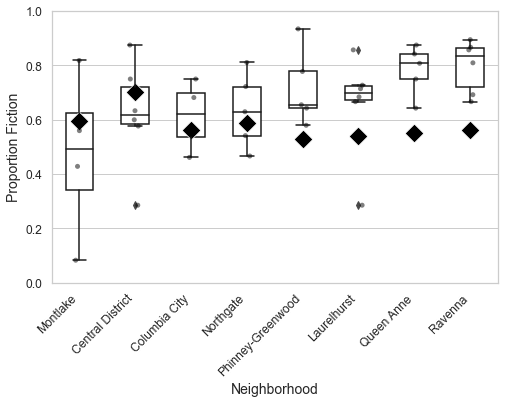

In [17]:
#Make the chart.


#Plots using Seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
bplot = sns.boxplot(y='percent', x='neighborhood', data=fic,
                 width=0.5)
#                 palette="colorblind")

#Remove default colors 
plt.setp(bplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(bplot.lines, color='k')

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='percent', x='neighborhood', data=fic, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

# SPL fiction percentages
bplot=sns.scatterplot(y='percent', x='neighborhood', data=ficSPLsorted, marker='D', color='#000000', s=175)


#Set y axis label and scale

bplot.set_ylabel("Proportion Fiction",
                fontsize=14)
bplot.set_xlabel("Neighborhood",
                fontsize=14)
bplot.set(ylim=(0, 1))

#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right') #This sets horizontal alignment

In [11]:
bks.age.unique()

array(['Adult', 'Childrens', 'Young Adult'], dtype=object)

### Boxplot for age

Text(0, 0.5, 'number of books')

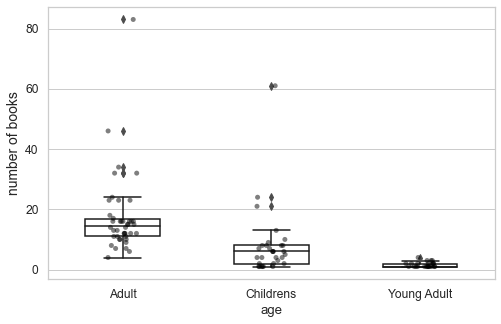

In [18]:
#Groups count by collection and age
bksage = bks.groupby(['neighborhood', 'collection','age'])['count'].sum().reset_index()
#bksage.head()

#Plots using Seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
bplot = sns.boxplot(y='count', x='age', data=bksage,
                 width=0.5)
#                 palette="colorblind")

#Remove default colors 
plt.setp(bplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(bplot.lines, color='k')

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='count', x='age', data=bksage, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bplot.set_ylabel("Number of books",
                fontsize=14)

## Juvenile books across neighborhoods

In [13]:
#Set up the Dataframe - does this leave out LFLs that have no juvenile literature?

#Groups count by Neighborhood, collection, and type (fiction or non fiction), calculate percent
bksjuvenile = bks.groupby(['neighborhood','collection', 'age'])['count'].sum().reset_index()
bksjuvenile['total'] = bksjuvenile.groupby('collection')['count'].transform('sum')
bksjuvenile['juvpercent'] = bksjuvenile['count']/bksjuvenile['total']

#Some LFLs have only adult books. These need a zero percent value
bksjuvenile.loc[bksjuvenile.juvpercent == 1, 'juvpercent'] = 0
juv = bksjuvenile.drop(bksjuvenile[(bksjuvenile['age'] == 'Adult') & (bksjuvenile['juvpercent'] > 0)].index)

#Sort and reindex so that the chart goes low to high
juv['median'] = juv.groupby('neighborhood')['juvpercent'].transform('median')
juv = juv.sort_values(by=['median'], ascending=True).reset_index()


In [14]:
#Open SPL fiction dataframe from the Get-SPL-Book-Data-by-hood jupyter file
juvSPL = pd.read_csv('SPL-juvenilePercent.csv',encoding='utf-8')
juvSPL.head(8)

,neighborhood,ageletter,count,total,percent
0,Central District,j,4706,7809,0.602638
1,Columbia City,j,11587,26486,0.437476
2,Laurelhurst,j,8380,23965,0.349677
3,Montlake,j,6266,13006,0.481778
4,Northgate,j,11591,27569,0.420436
5,Phinney-Greenwood,j,18297,42934,0.426166
6,Queen Anne,j,7791,18491,0.421340
7,Ravenna,j,31327,75382,0.415577


In [15]:
#Get the medians from the LFL data and sort so that the points go to the right places
mediansjuv = juv[['neighborhood','median']].copy()
mediansjuv.drop_duplicates(inplace=True)
#medians
juvSPLsorted = pd.merge(mediansjuv, juvSPL, on='neighborhood', how='inner')
juvSPLsorted.sort_values(by=['median'], ascending=True)
#juvSPLsorted = juvSPLsorted.fillna('1.2')
juvSPLsorted.head(8)

,neighborhood,median,ageletter,count,total,percent
0,Central District,0.016667,j,4706,7809,0.602638
1,Montlake,0.043810,j,6266,13006,0.481778
2,Northgate,0.070370,j,11591,27569,0.420436
3,Ravenna,0.095238,j,31327,75382,0.415577
4,Columbia City,0.107143,j,11587,26486,0.437476
5,Phinney-Greenwood,0.111111,j,18297,42934,0.426166
6,Laurelhurst,0.142857,j,8380,23965,0.349677
7,Queen Anne,0.291667,j,7791,18491,0.421340


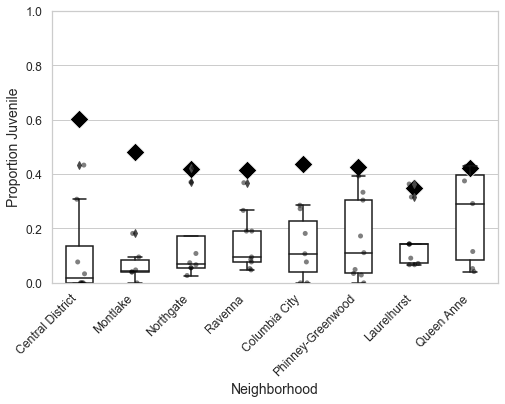

In [17]:
#Make the chart.


#Plots using Seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
bplot = sns.boxplot(y='juvpercent', x='neighborhood', data=juv,
                 width=0.5)
#                 palette="colorblind")

#Remove default colors 
plt.setp(bplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(bplot.lines, color='k')

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='juvpercent', x='neighborhood', data=juv, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

# SPL juvenile percentages
bplot=sns.scatterplot(y='percent', x='neighborhood', data=juvSPLsorted, marker='D', color='#000000', s=175)


#Set y axis label and scale

bplot.set_ylabel("Proportion Juvenile",
                fontsize=14)
bplot.set_xlabel("Neighborhood",
                fontsize=14)
bplot.set(ylim=(0, 1))



#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right') #This sets horizontal alignment

## Examine Author Diversity
We hand coded authors as either white or non white.  The list was first compared to two lists crowdsourced on GoodReads (https://www.goodreads.com/list/show/96119._ReadPOC_List_of_Books_by_Authors_of_Color and https://www.goodreads.com/list/show/96282._ReadPOC_List_of_Romance_Books_by_Authors_of_Color).  Then all other names were checked through a google search.  Any author with information clearly stating they were a person of color or were from a country other than the US, Europe, Australia, and New Zealand, were counted as a person of color. 

In [18]:
# Remove non person authors
bksauthors = bks.loc[bks['nonPersonAuthor']==0].copy()
bksauthors.head()

,yrpub,count,authorOfColor,nonPersonAuthor,neighborhood,collection,type,age,category1,category2,languages,originalLang
2,2012,1,0,0,Northgate,Northgate3,Fiction,Childrens,Null,Null,English,English
3,1967,1,0,0,Phinney-Greenwood,Phinney-Green2,Nonfiction,Adult,Self Help/Health,Null,English,NaN
4,1984,1,0,0,Phinney-Greenwood,Phinney-Green3,Nonfiction,Adult,History,Null,English,English
5,1970,1,1,0,Northgate,Northgate2,Nonfiction,Adult,Religion,Null,NaN,NaN
7,2000,1,0,0,Northgate,Northgate1,Nonfiction,Childrens,Null,Null,English,English


In [19]:
#Some basic stats
aocbooks=bksauthors['authorOfColor'].sum()
totalbks = bksauthors['count'].sum()
aocPercent = aocbooks/totalbks
print(f'Total books: {totalbks}, total authors of color: {aocbooks}, proportion authors of color: {aocPercent}')

Total books: 991, total authors of color: 68, proportion authors of color: 0.06861755802219979


In [20]:
#Percent by neighborhood 
#Groups count by neighborhood, collection, calculate percent
bksauthorshood = bksauthors.groupby(['neighborhood', 'authorOfColor'])['count'].sum().reset_index()
bksauthorshood['total'] = bksauthorshood.groupby('neighborhood')['count'].transform('sum')
bksauthorshood['percent'] = bksauthorshood['count']/bksauthorshood['total']

bksauthorshood = bksauthorshood.loc[bksauthorshood['authorOfColor']==1].copy() #adding the .copy() gets rid of the settingwithcopywarning

#Sort and reindex so that the chart goes low to high
bksauthorshood = bksauthorshood.sort_values(by=['percent'], ascending=True).reset_index()

In [21]:
bksauthorshood.head(8)

,index,neighborhood,authorOfColor,count,total,percent
0,1,Central District,1,4,92,0.043478
1,11,Phinney-Greenwood,1,9,187,0.048128
2,7,Montlake,1,4,78,0.051282
3,15,Ravenna,1,7,124,0.056452
4,5,Laurelhurst,1,6,90,0.066667
5,3,Columbia City,1,6,83,0.072289
6,9,Northgate,1,22,233,0.094421
7,13,Queen Anne,1,10,104,0.096154


In [22]:
#Percent by LFL and neighborhood

#Groups count by neighborhood, collection, calculate percent
bksauthorsgrp = bksauthors.groupby(['neighborhood','collection', 'authorOfColor'])['count'].sum().reset_index()
bksauthorsgrp['total'] = bksauthorsgrp.groupby('collection')['count'].transform('sum')
bksauthorsgrp['percent'] = bksauthorsgrp['count']/bksauthorsgrp['total']



In [23]:
# I inspected the data and there are no LFLs with 100% authors of color.  To preserve the LFLs with no authors of color
# convert those with 100% white authors to zeros.  Then remove the rows that show percent white authors below 100%
#leaving percent column only percent authors of color

bksauthorsgrp.loc[bksauthorsgrp.percent == 1, 'percent'] = 0
bksaoc = bksauthorsgrp.drop(bksauthorsgrp[(bksauthorsgrp['authorOfColor'] == 0) & (bksauthorsgrp['percent'] > 0)].index)
bksaoc.head()

,neighborhood,collection,authorOfColor,count,total,percent
0,Central District,CentralDistrict1,0,4,4,0.000000
2,Central District,CentralDistrict2,1,2,16,0.125000
3,Central District,CentralDistrict3,0,30,30,0.000000
4,Central District,CentralDistrict4,0,25,25,0.000000
6,Central District,CentralDistrict5,1,1,7,0.142857


In [24]:
#Sort and reindex so that the chart will go low to high
bksaoc['median'] = bksaoc.groupby('neighborhood')['percent'].transform('median')
bksaoc = bksaoc.sort_values(by=['median'], ascending=True).reset_index()
bksaoc.head()

,index,neighborhood,collection,authorOfColor,count,total,percent,median
0,32,Montlake,Montlake6,0,11,11,0.000000,0.020833
1,31,Montlake,Montlake5,1,3,19,0.157895,0.020833
2,29,Montlake,Montlake4,1,1,24,0.041667,0.020833
3,27,Montlake,Montlake2,0,24,24,0.000000,0.020833
4,48,Phinney-Greenwood,Phinney-Green5,0,17,17,0.000000,0.029851


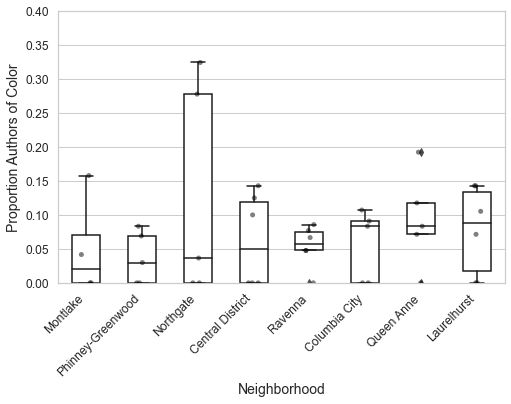

In [25]:
#Plots using Seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

bplot = sns.boxplot(y='percent', x='neighborhood', data=bksaoc,
                 width=0.5)
#                 palette="colorblind")

#Remove default colors 
plt.setp(bplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(bplot.lines, color='k')

# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(y='percent', x='neighborhood', data=bksaoc, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

#Set y axis label and scale

bplot.set_ylabel("Proportion Authors of Color",
                fontsize=14)
bplot.set_xlabel("Neighborhood",
                fontsize=14)
bplot.set(ylim=(0, 0.4))



#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right') #This sets horizontal alignment

### Add in socioeconomic data from census data notebook
The chart this produces is a scatterplot of percent authors of color versus gini-simpson index.

In [26]:
dfsocioecon = pd.read_csv('socioeconomic-by-neighborhood.csv', encoding='utf-8')

In [27]:
#Merge with the lfl number dataset
dfAocSocio = pd.merge(bksauthorshood, dfsocioecon, on='neighborhood', how='inner')
dfAocSocio.head()

,index,neighborhood,authorOfColor,count,total,percent,avg-median-income,pop,numlfls,tot,...,afam,amin,as,hw,ot,combo1,combo2,combo3,simpsons,gini-simp
0,1,Central District,1,4,92,0.043478,98985.250000,16969,12,19498,...,2675,134,1193,173,513,1053,38,1015,0.526829,0.473171
1,11,Phinney-Greenwood,1,9,187,0.048128,96876.333333,23948,20,25401,...,424,85,1668,14,310,1469,94,1375,0.722881,0.277119
2,7,Montlake,1,4,78,0.051282,144488.500000,8644,8,9546,...,109,36,763,38,91,461,60,401,0.721553,0.278447
3,15,Ravenna,1,7,124,0.056452,101129.833333,24187,24,25957,...,376,58,3135,98,298,1405,85,1320,0.649513,0.350487
4,5,Laurelhurst,1,6,90,0.066667,127971.500000,10479,11,11010,...,303,0,1289,13,45,478,0,478,0.669051,0.330949


In [29]:
#Get rid of extraneous columns
dfAocSocio = dfAocSocio.drop(columns=['tot','wh','afam','amin','as','hw','ot','combo1','combo2','combo3'])

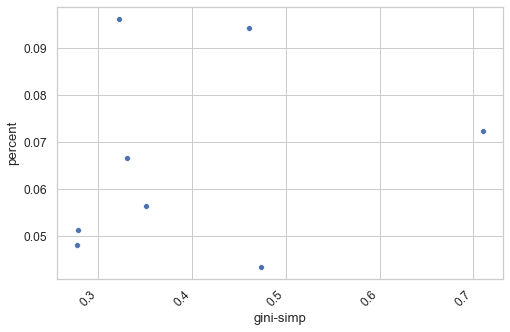

In [35]:
#Plots using Seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

bplot = sns.scatterplot(y='percent', x='gini-simp', data=dfAocSocio)
#                 palette="colorblind")

#Remove default colors 
plt.setp(bplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(bplot.lines, color='k')


#rotate labels
for item in bplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right') #This sets horizontal alignment

## Create dataset with LFL volumes and owner intentions.
### books per vol, childrens books per vol, percent children's
Dataframe = bksctstat
Set up a seperate csv with lfl volume and house price. Make sure all numerical columns are number format. Year is okay as int

In [20]:
#SKIP this if you are running from the beginning
bksctstat = pd.read_csv('bkstats.csv',encoding='utf-8')

In [24]:
#Only do this if you are running from the beginning
dfstats = pd.read_csv('lfl-stats.csv')

In [25]:
dfstats['vol'] = (dfstats['width']*dfstats['length']*dfstats['height']/1728) #add a vol column with cubic feet units
dfstats = dfstats[np.isfinite(dfstats['vol'])] #Keep rows that have vol
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   collection     42 non-null     object 
 1   width          42 non-null     float64
 2   length         42 non-null     float64
 3   height         42 non-null     int64  
 4   volMeters      42 non-null     float64
 5   housePrice     42 non-null     object 
 6   address        42 non-null     object 
 7   priceLastSold  38 non-null     float64
 8   yearLastSold   38 non-null     float64
 9   adjPrice       38 non-null     float64
 10  specific       42 non-null     object 
 11  current        42 non-null     object 
 12  variety        42 non-null     object 
 13  kids           42 non-null     object 
 14  religion       42 non-null     object 
 15  porn           42 non-null     object 
 16  vol            42 non-null     float64
dtypes: float64(7), int64(1), object(9)
memory usage: 5.9+ KB

In [26]:
#Groups count by collection
bksct = bks.groupby(['neighborhood','collection'])['count'].sum().reset_index()
bksct.head()

,neighborhood,collection,count
0,Central District,CentralDistrict1,4
1,Central District,CentralDistrict2,16
2,Central District,CentralDistrict3,30
3,Central District,CentralDistrict4,26
4,Central District,CentralDistrict5,7


### Books per Volume

In [27]:
#Create a new dataframe of book counts and lfl stats. Inner join is intersection so removes rows with no partner in other dataframe
bksctstat = pd.merge(dfstats, bksct, on='collection', how='inner')

In [28]:
bksctstat.head()

,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,specific,current,variety,kids,religion,porn,vol,neighborhood,count
0,CentralDistrict1,0.0,0.0,0,0.000000,0,2423 E Union St,0.0,0.0,0.0000,n,n,n,n,n,n,0.000000,Central District,4
1,CentralDistrict2,22.0,11.0,12,0.047588,"730,824",1829 Martin Luther King Jr. Way,459900.0,2010.0,536554.0424,n,n,n,n,n,n,1.680556,Central District,16
2,CentralDistrict3,23.0,11.0,14,0.058043,"667,296",210 30th Ave.,60500.0,1989.0,124155.9225,n,n,n,n,n,n,2.049769,Central District,30
3,CentralDistrict4,16.0,13.5,21,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,437730.5987,n,n,n,n,y,n,2.625000,Central District,26
4,CentralDistrict5,13.0,14.5,12,0.037067,1278803,331 30th Ave.,757500.0,2013.0,827225.2702,n,n,y,y,n,n,1.309028,Central District,7


In [29]:
bksctstat['bkPerVol'] = bksctstat['count']/bksctstat['vol']
bksctstat.head(5)

,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,specific,current,variety,kids,religion,porn,vol,neighborhood,count,bkPerVol
0,CentralDistrict1,0.0,0.0,0,0.000000,0,2423 E Union St,0.0,0.0,0.0000,n,n,n,n,n,n,0.000000,Central District,4,inf
1,CentralDistrict2,22.0,11.0,12,0.047588,"730,824",1829 Martin Luther King Jr. Way,459900.0,2010.0,536554.0424,n,n,n,n,n,n,1.680556,Central District,16,9.520661
2,CentralDistrict3,23.0,11.0,14,0.058043,"667,296",210 30th Ave.,60500.0,1989.0,124155.9225,n,n,n,n,n,n,2.049769,Central District,30,14.635799
3,CentralDistrict4,16.0,13.5,21,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,437730.5987,n,n,n,n,y,n,2.625000,Central District,26,9.904762
4,CentralDistrict5,13.0,14.5,12,0.037067,1278803,331 30th Ave.,757500.0,2013.0,827225.2702,n,n,y,y,n,n,1.309028,Central District,7,5.347480


In [30]:
totalbooks=bksctstat['count'].sum()
totalvol = bksctstat['vol'].sum()
bkdensity = totalbooks/totalvol
print(bkdensity)

7.419751759854206


In [31]:
bksctstat['medianVol'] = bksctstat.groupby('neighborhood')['bkPerVol'].transform('median')
mediansVol = bksctstat[['neighborhood','medianVol']].copy()
mediansVol.drop_duplicates(inplace=True)
mediansVol

,neighborhood,medianVol
0,Central District,9.712712
6,Columbia City,7.233909
11,Laurelhurst,7.132591
17,Montlake,11.760000
21,Northgate,10.633846
26,Phinney-Greenwood,9.376534
31,Queen Anne,9.047966
36,Ravenna,9.926579


In [114]:
bksctstat.bkPerVol.unique()

array([        inf,  9.52066116, 14.63579898,  9.9047619 ,  5.34748011,
        5.81818182,  6.41989069,  7.23390895, 10.10526316, 13.96363636,
        5.58062284,  7.26923077,  3.67771359,  8.        ,  6.99595142,
       11.264     ,  4.5       , 11.52      , 12.        , 12.40615385,
        7.98655462, 15.95076923, 22.2       ,  3.19736842,  8.86153846,
       10.63384615,  9.81818182,  8.56322625,  9.3765335 , 12.77672727,
        8.3951417 ,  4.56      ,  9.04796634,  7.85454545, 10.8       ,
       18.61818182,  8.22238918, 15.65217391,  5.97923875, 12.08391608,
       11.63076923,  6.4962406 ])

[Text(0, 0.5, 'Books per Cubic Foot'),
 Text(0.5, 0, 'Seattle Little Free Libraries')]

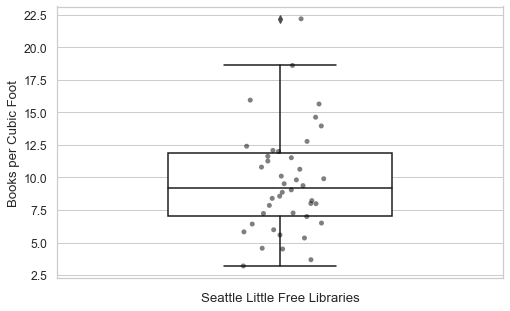

In [33]:
#Plots using Seaborn
bksctstatplot = sns.boxplot(y='bkPerVol', data=bksctstat,
                 width=0.5)
#                palette="colorblind")

#Remove default colors 
plt.setp(bksctstatplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(bksctstatplot.lines, color='k')

# add stripplot to boxplot with Seaborn
bksctstatplot =sns.stripplot(y='bkPerVol', data=bksctstat, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bksctstatplot.set(xlabel='Seattle Little Free Libraries', ylabel='Books per Cubic Foot')

In [34]:
#Set up the dataframe to plot median book per volume by neighborhood

#Groups count by Neighborhood, calculate median
bksctstat['median'] = bksctstat.groupby('neighborhood')['bkPerVol'].transform('median')
bksctstat = bksctstat.sort_values(by=['median'], ascending=True).reset_index()
bksctstat.head(1)

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,variety,kids,religion,porn,vol,neighborhood,count,bkPerVol,medianVol,median
0,15,Laurelhurst5,15.0,15.0,15,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,n,n,n,y,1.953125,Laurelhurst,22,11.264,7.132591,7.132591


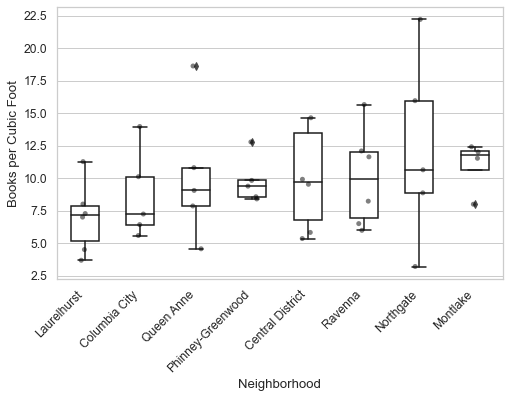

In [35]:
#Plots using Seaborn


bksctstatplot = sns.boxplot(y='bkPerVol', x='neighborhood', data=bksctstat,
                 width=0.5)
#                 palette="colorblind")

#Remove default colors 
plt.setp(bksctstatplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(bksctstatplot.lines, color='k')

# add stripplot to boxplot with Seaborn
bksctstatplot=sns.stripplot(y='bkPerVol', x='neighborhood', data=bksctstat, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bksctstatplot.set(xlabel='Neighborhood', ylabel='Books per Cubic Foot')

#rotate labels
for item in bksctstatplot.get_xticklabels():
    item.set_rotation(45)
    item.set_ha('right')

In [118]:
bksctstat.to_csv('bkstats.csv', mode = 'w', index=False)


# Scatter Plots

## General

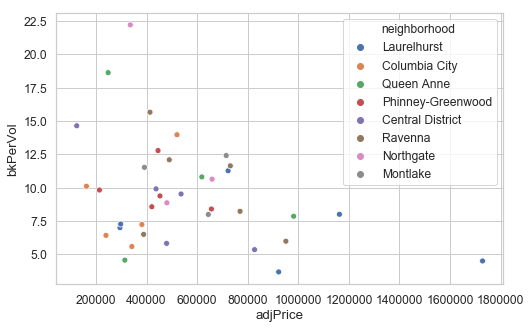

In [120]:
#Adjusted price (price house sold, but in today's dollars) vs books per vol)
bksctadj = sns.scatterplot(y='bkPerVol', x='adjPrice', data=bksctstat,
                 hue='neighborhood')

## Children's

In [121]:
#Create a new dataframe of children's books and lfl stats. Inner join is intersection so removes rows with no partner in other dataframe
bkschil = bksage.loc[bksage['age']=="Childrens"]
bksstatchil = pd.merge(bksctstat, bkschil, on='collection', how='inner')
bksstatchil.rename(columns = {'count_x':'total_count'}, inplace = True)
bksstatchil.rename(columns = {'count_y':'child_count'}, inplace = True)
bksstatchil.rename(columns = {'neighborhood_x':'neighborhood'}, inplace = True)
bksstatchil=bksstatchil.drop('neighborhood_y',1)
bksstatchil.head()

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,religion,porn,vol,neighborhood,total_count,bkPerVol,medianVol,median,age,child_count
0,15,Laurelhurst5,15.0,15.0,15,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,n,y,1.953125,Laurelhurst,22,11.264000,7.132591,7.132591,Childrens,8
1,16,Laurelhurst6,16.0,12.0,14,0.044048,2298775,3916 NE Surber Dr.,1250000.0,2003.0,...,n,n,1.555556,Laurelhurst,7,4.500000,7.132591,7.132591,Childrens,1
2,14,Laurelhurst4,19.0,13.0,15,0.060714,1922694,6522 50th Ave NE,189070.0,1998.0,...,n,n,2.144097,Laurelhurst,15,6.995951,7.132591,7.132591,Childrens,1
3,13,Laurelhurst3,18.0,12.0,19,0.067252,1746975,6500 55th Ave NE,984000.0,2008.0,...,n,y,2.375000,Laurelhurst,19,8.000000,7.132591,7.132591,Childrens,6
4,12,Laurelhurst2,22.0,13.0,23,0.107794,1446525,4742 48th Ave NE,685000.0,2004.0,...,n,n,3.806713,Laurelhurst,14,3.677714,7.132591,7.132591,Childrens,2


In [122]:
#Divide number of books by volume
bksstatchil['chilbkPerVol'] = bksstatchil['child_count']/bksstatchil['vol']
bksstatchil.head(5)

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,porn,vol,neighborhood,total_count,bkPerVol,medianVol,median,age,child_count,chilbkPerVol
0,15,Laurelhurst5,15.0,15.0,15,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,y,1.953125,Laurelhurst,22,11.264000,7.132591,7.132591,Childrens,8,4.096000
1,16,Laurelhurst6,16.0,12.0,14,0.044048,2298775,3916 NE Surber Dr.,1250000.0,2003.0,...,n,1.555556,Laurelhurst,7,4.500000,7.132591,7.132591,Childrens,1,0.642857
2,14,Laurelhurst4,19.0,13.0,15,0.060714,1922694,6522 50th Ave NE,189070.0,1998.0,...,n,2.144097,Laurelhurst,15,6.995951,7.132591,7.132591,Childrens,1,0.466397
3,13,Laurelhurst3,18.0,12.0,19,0.067252,1746975,6500 55th Ave NE,984000.0,2008.0,...,y,2.375000,Laurelhurst,19,8.000000,7.132591,7.132591,Childrens,6,2.526316
4,12,Laurelhurst2,22.0,13.0,23,0.107794,1446525,4742 48th Ave NE,685000.0,2004.0,...,n,3.806713,Laurelhurst,14,3.677714,7.132591,7.132591,Childrens,2,0.525388


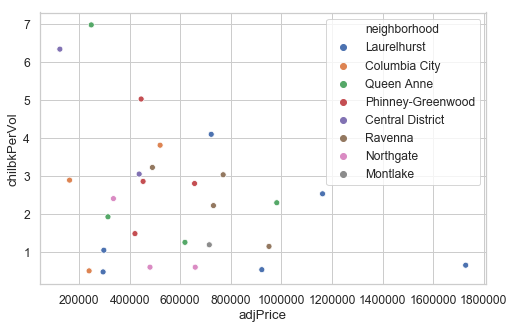

In [123]:
#Adjusted price (price house sold, but in today's dollars) vs children's books per vol)
childbooks = sns.scatterplot(y='chilbkPerVol', x='adjPrice', data=bksstatchil,
                 hue='neighborhood')

In [124]:
#Create a total column
bksage['total'] = bksage.groupby('collection')['count'].transform('sum') #I think this is redundant
bksagechil=bksage.loc[bksage['age']=="Childrens"] #select the children's books rows
#create a percent column
bksagechil['percent'] = bksagechil['count']/bksagechil['total']
bksagechil.head()


C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,neighborhood,collection,age,count,total,percent
3,Central District,CentralDistrict3,Childrens,13,30,0.433333
6,Central District,CentralDistrict4,Childrens,8,26,0.307692
11,Columbia City,ColumbiaCity1,Childrens,1,13,0.076923
14,Columbia City,ColumbiaCity3,Childrens,8,28,0.285714
17,Columbia City,ColumbiaCity4,Childrens,6,22,0.272727


In [125]:
perchilstat = pd.merge(dfstats, bksagechil, on='collection', how='inner')
perchilstat.head()

,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,adjPrice,...,variety,kids,religion,porn,vol,neighborhood,age,count,total,percent
0,CentralDistrict3,23.0,11.00,14,0.058043,"667,296",210 30th Ave.,60500.0,1989.0,124155.9225,...,n,n,n,n,2.049769,Central District,Childrens,13,30,0.433333
1,CentralDistrict4,16.0,13.50,21,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,437730.5987,...,n,n,y,n,2.625000,Central District,Childrens,8,26,0.307692
2,ColumbiaCity1,15.5,10.75,21,0.057340,620272,5107 46th Ave S,157000.0,1999.0,239776.6772,...,n,n,n,n,2.024957,Columbia City,Childrens,1,13,0.076923
3,ColumbiaCity3,21.0,12.00,19,0.078461,698514,3080 S Andover St.,117500.0,2003.0,162493.3477,...,n,n,n,n,2.770833,Columbia City,Childrens,8,28,0.285714
4,ColumbiaCity4,16.5,11.00,15,0.044614,579426,3414 35th Ave S.,501500.0,2017.0,520487.1418,...,n,n,y,y,1.575521,Columbia City,Childrens,6,22,0.272727


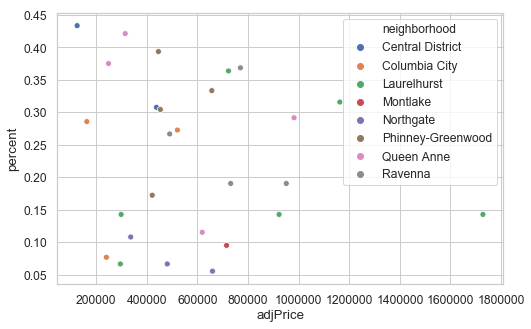

In [126]:
#Adjusted price (price house sold, but in today's dollars) vs percent children's books)
percentChildBks = sns.scatterplot(y='percent', x='adjPrice', data=perchilstat,
                 hue='neighborhood')

## Checking Preference

#### Checking People's Desires vs the Content - Children

Would be good to see number of LFLs with childrens and not.

df.loc[df['Percent']>0,'Match'] = df['Percent']

In [37]:
#Create a new dataframe of religion books and lfl stats. Inner join is intersection so removes rows with no partner in other dataframe
bkspref = bks.groupby(['neighborhood', 'collection','age'])['count'].sum().reset_index()
bkschildren = bkspref.loc[bkspref['age']=="Childrens"]
bksstatchil = pd.merge(bksctstat, bkschildren, on='collection', how='inner')
bksstatchil.rename(columns = {'count_x':'total_count'}, inplace = True)
bksstatchil.rename(columns = {'count_y':'chil_count'}, inplace = True)
bksstatchil.rename(columns = {'neighborhood_y':'neighborhood'}, inplace = True)

bksstatchil.head()

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,porn,vol,neighborhood_x,total_count,bkPerVol,medianVol,median,neighborhood,age,chil_count
0,15,Laurelhurst5,15.0,15.0,15,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,y,1.953125,Laurelhurst,22,11.264000,7.132591,7.132591,Laurelhurst,Childrens,8
1,16,Laurelhurst6,16.0,12.0,14,0.044048,2298775,3916 NE Surber Dr.,1250000.0,2003.0,...,n,1.555556,Laurelhurst,7,4.500000,7.132591,7.132591,Laurelhurst,Childrens,1
2,14,Laurelhurst4,19.0,13.0,15,0.060714,1922694,6522 50th Ave NE,189070.0,1998.0,...,n,2.144097,Laurelhurst,15,6.995951,7.132591,7.132591,Laurelhurst,Childrens,1
3,13,Laurelhurst3,18.0,12.0,19,0.067252,1746975,6500 55th Ave NE,984000.0,2008.0,...,y,2.375000,Laurelhurst,19,8.000000,7.132591,7.132591,Laurelhurst,Childrens,6
4,12,Laurelhurst2,22.0,13.0,23,0.107794,1446525,4742 48th Ave NE,685000.0,2004.0,...,n,3.806713,Laurelhurst,14,3.677714,7.132591,7.132591,Laurelhurst,Childrens,2


In [38]:
#Calculate Percent- This data frame does not include LFLs with no religious material!
bksstatchil['percent'] = bksstatchil['chil_count']/bksstatchil['total_count']
bksstatchil[bksstatchil['kids']=='y']

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,vol,neighborhood_x,total_count,bkPerVol,medianVol,median,neighborhood,age,chil_count,percent
5,11,Laurelhurst1,16.0,13.0,16,0.054536,958935,4709 46th Ave NE,188000.0,1997.0,...,1.925926,Laurelhurst,14,7.269231,7.132591,7.132591,Laurelhurst,Childrens,2,0.142857
20,36,Ravenna1,16.5,11.0,22,0.065433,1002463,1211 NE 70th St,610000.0,2006.0,...,2.310764,Ravenna,19,8.222389,9.926579,9.926579,Ravenna,Childrens,7,0.368421
21,38,Ravenna3,17.0,17.0,21,0.099453,1246533,6211 Ravenna Ave NE,885000.0,2014.0,...,3.512153,Ravenna,21,5.979239,9.926579,9.926579,Ravenna,Childrens,4,0.190476
27,21,Northgate1,15.0,13.0,15,0.047932,705663,9000 5th Ave NE,NaN,NaN,...,1.692708,Northgate,27,15.950769,10.633846,10.633846,Northgate,Childrens,10,0.370370
29,19,Montlake5,15.0,13.0,15,0.047932,1090502,2505 20th Ave E,517000.0,2003.0,...,1.692708,Montlake,21,12.406154,11.760000,11.760000,Montlake,Childrens,2,0.095238


In [39]:
#Mean percent by whether they do not want religios books or na.  Need to compare to total mean.  Will need to create new dataframe.
bksstatchilcomp = bksstatchil.groupby(['kids'])['percent'].mean().reset_index()
bksstatchilcomp.head()

,kids,percent
0,n,0.245942
1,y,0.233473


In [40]:
#Get percents with zero values

bksagestat = pd.merge(bksctstat, bkspref, on='collection', how='inner')
#Calculate Percent
bksagestat['percent'] = bksagestat['count_y']/bksagestat['count_x']
#Get only childrens- should be one line for every collection with childrens material
bksagestatchil = bksagestat.loc[bksagestat['age']=="Childrens"]
#Get only the collection and percent columns
bksagestatchil = bksagestatchil[['collection','kids','percent']]
#Create dataframe of just collections
collections = bksctstat[['collection']]
#Merge to add the collections with no religious material and then convert NaNs to zero
percentschil = pd.merge(collections, bksagestatchil, on='collection', how='outer')
percentschil.fillna(0, inplace = True)

In [41]:
percentschil.head()

,collection,kids,percent
0,Laurelhurst5,n,0.363636
1,Laurelhurst6,n,0.142857
2,Laurelhurst4,n,0.066667
3,Laurelhurst3,n,0.315789
4,Laurelhurst2,n,0.142857


In [42]:
#For overall percent of children's books
#Get percents for each category
#Group by category
bksagepercent = bks.groupby(['age'])['count'].sum().reset_index()
#Get total
bkscatTotal = bks['count'].sum()
#create a percent column
bksagepercent['percent'] = bksagepercent['count']/bkscatTotal
#Sort by the percent
bksagepercent.sort_values(by='percent', ascending=False, inplace=True)
bksagepercent.head(15)

,age,count,percent
0,Adult,730,0.719921
1,Childrens,244,0.240631
2,Young Adult,40,0.039448


In [43]:
#Average percent religious material when kids material was present
print(bksagestatchil['percent'].mean())

0.2439308752879256


In [44]:
#Average percent childrens books in lfls incl zeros
percentschil['percent'].mean()

0.18004421747442131

In [45]:
#t-test

from scipy.stats import ttest_ind

cat1 = percentschil[percentschil['kids']=='y']
cat2 = percentschil[percentschil['kids']=='n']

ttest_ind(cat1['percent'], cat2['percent'])

Ttest_indResult(statistic=-0.19237968483306994, pvalue=0.8487856639414106)

In [135]:
#These are the same numbers as the groupby calculation above.
print(cat1['percent'].mean())
print(cat2['percent'].mean())

0.23347257031467555
0.2459420877827814


#### Checking People's Desires vs the Content - Religion
This is tough because most who say they don't want religious texts, don't have any so there are a lot of zeros.  Those get dropped in the innter join.
Best thing to do would be just report religion as exists or not.

In [46]:
#Create a new dataframe of religion books and lfl stats. Inner join is intersection so removes rows with no partner in other dataframe
bkscategory = bks.groupby(['neighborhood', 'collection','category1'])['count'].sum().reset_index()
bksrel = bkscategory.loc[bkscategory['category1']=="Religion"]
bksstatrel = pd.merge(bksctstat, bksrel, on='collection', how='inner')
bksstatrel.rename(columns = {'count_x':'total_count'}, inplace = True)
bksstatrel.rename(columns = {'count_y':'rel_count'}, inplace = True)
bksstatrel.rename(columns = {'neighborhood_y':'neighborhood'}, inplace = True)
#bksstatrel=bksstatchil.drop('neighborhood_x',1)
bksstatrel.head()

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,porn,vol,neighborhood_x,total_count,bkPerVol,medianVol,median,neighborhood,category1,rel_count
0,15,Laurelhurst5,15.0,15.00,15,0.055306,1497532,6116 65th Ave NE,522500.0,2003.0,...,y,1.953125,Laurelhurst,22,11.264000,7.132591,7.132591,Laurelhurst,Religion,1
1,16,Laurelhurst6,16.0,12.00,14,0.044048,2298775,3916 NE Surber Dr.,1250000.0,2003.0,...,n,1.555556,Laurelhurst,7,4.500000,7.132591,7.132591,Laurelhurst,Religion,1
2,8,ColumbiaCity3,21.0,12.00,19,0.078461,698514,3080 S Andover St.,117500.0,2003.0,...,n,2.770833,Columbia City,28,10.105263,7.233909,7.233909,Columbia City,Religion,1
3,6,ColumbiaCity1,15.5,10.75,21,0.057340,620272,5107 46th Ave S,157000.0,1999.0,...,n,2.024957,Columbia City,13,6.419891,7.233909,7.233909,Columbia City,Religion,1
4,35,QueenAnne5,13.5,11.00,15,0.036502,1180137,220 W Howe St.,105000.0,1985.0,...,y,1.289062,Queen Anne,24,18.618182,9.047966,9.047966,Queen Anne,Religion,1


In [47]:
#Calculate Percent
bksstatrel['percent'] = bksstatrel['rel_count']/bksstatrel['total_count']
bksstatrel[bksstatrel['religion']=='y']

,index,collection,width,length,height,volMeters,housePrice,address,priceLastSold,yearLastSold,...,vol,neighborhood_x,total_count,bkPerVol,medianVol,median,neighborhood,category1,rel_count,percent
8,29,Phinney-Green4,22.0,15.0,25,0.135193,822764,9716 Phinney Ave N.,315000.0,2002.0,...,4.774306,Phinney-Greenwood,61,12.776727,9.376534,9.376534,Phinney-Greenwood,Religion,2,0.032787
10,3,CentralDistrict4,16.0,13.5,21,0.074332,"764,635",3001 E. Harrison St.,325000.0,2004.0,...,2.625000,Central District,26,9.904762,9.712712,9.712712,Central District,Religion,3,0.115385
15,22,Northgate2,12.0,12.0,20,0.047195,843520,530 NE 100th St.,219950.0,1999.0,...,1.666667,Northgate,37,22.200000,10.633846,10.633846,Northgate,Religion,4,0.108108


[Text(0, 0.5, 'Percent religious books in LFL'),
 Text(0.5, 0, 'Steward reports removing religious books')]

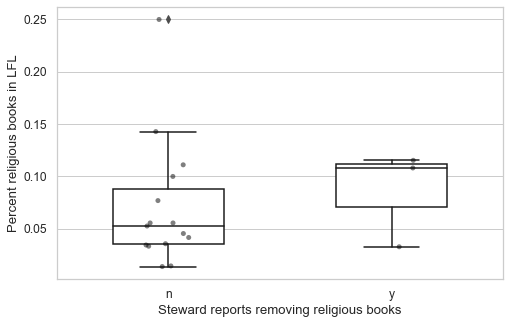

In [48]:
#Plots using Seaborn


bksstatrelplot = sns.boxplot(y='percent', x='religion', data=bksstatrel,
                 width=0.5)
#                 palette="colorblind")

#Remove default colors 
plt.setp(bksstatrelplot.artists, edgecolor = 'k', facecolor='w')
plt.setp(bksstatrelplot.lines, color='k')

# add stripplot to boxplot with Seaborn
bksstatrelplot=sns.stripplot(y='percent', x='religion', data=bksstatrel, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')

bksstatrelplot.set(xlabel='Steward reports removing religious books', ylabel='Percent religious books in LFL')


In [139]:
bkscatstat = pd.merge(bksctstat, bkscategory, on='collection', how='inner')
#Calculate Percent
bkscatstat['percent'] = bkscatstat['count_y']/bkscatstat['count_x']
#Get only religion- should be one line for every collection with religious material
bkscatstatrel = bkscatstat.loc[bkscatstat['category1']=="Religion"]
#Get only the collection and percent columns
bkscatstatrel = bkscatstatrel[['collection','percent']]
#Create dataframe of just collections
collections = bksctstat[['collection']]
#Merge to add the collections with no religious material and then convert NaNs to zero
percentsrel = pd.merge(collections, bkscatstatrel, on='collection', how='outer')
percentsrel.fillna(0, inplace = True)

In [151]:
#For overall percent religious material
#Get percents for each category
#Group by category
bksoverallpercent = bks.groupby(['category1'])['count'].sum().reset_index()
#Get total
bkscatTotal = bks['count'].sum()
#create a percent column
bksoverallpercent['percent'] = bksoverallpercent['count']/bkscatTotal
#Sort by the percent
bksoverallpercent.sort_values(by='percent', ascending=False, inplace=True)
bksoverallpercent.head(15)


,category1,count,percent
16,Null,238,0.234714
15,Novel,184,0.181460
13,Mystery,89,0.087771
25,Thriller/Suspense,68,0.067061
23,Self Help/Health,68,0.067061
21,SciFi/Fantasy,56,0.055227
3,Biography/Autobiography/Memoir,38,0.037475
6,Cookery,36,0.035503
8,Cultural Studies,29,0.028600
11,History,28,0.027613


In [140]:
#Average percent religious books in lfls incl zeros
percentsrel['percent'].mean()

0.03142730623785795

In [141]:
#Percent religious material when religious material was present
print(bksstatrel['percent'].mean())

0.07333038122166854


In [142]:
#t-test

from scipy.stats import ttest_ind

cat1 = bksstatrel[bksstatrel['religion']=='y']
cat2 = bksstatrel[bksstatrel['religion']=='n']

ttest_ind(cat1['percent'], cat2['percent'])

Ttest_indResult(statistic=0.38570192706777323, pvalue=0.7047974167216733)

### Sexual Material - don't have category for porn- check manually

## Pie Charts: Calculate the mean percent of each category

In [143]:
#Get percents of category1 by LFL.  Export the list.  THis is to compare what stewards say to what is in their library
bkscatlfl = bks.groupby(['collection', 'category1'])['count'].sum().reset_index()
#Replace 'Null' with 'Childrens'
bkscatlfl.loc[bkscatlfl.category1 == 'Null', 'category1'] = 'Childrens'
#Create a total column grouped by neighborhood
bkscatlfl['total'] = bkscatlfl.groupby('collection')['count'].transform('sum')
#create a percent column
bkscatlfl['percent'] = bkscatlfl['count']/bkscatlfl['total']
#Sort by the percent
bkscatlfl = bkscatlfl.groupby('collection').apply(pd.DataFrame.sort_values, 'percent', ascending=False)
#Neighborhood column at this point is both the grouping column and a data column, so delete the data one.
bkscatlfl = bkscatlfl.rename(columns={'collection': 'lflname'})

#Save csv file for further testing: 
bkscatlfl.to_csv('categories-by-LFL.csv', mode = 'w', index=False)


#bkscatlfl.head()

#Average percents:
catpercents = bkscatlfl.groupby(['category1'])['percent'].mean().reset_index()
print(catpercents)

#Children's here is not quite accurate!  If children's books were religious they were categorized.
#All others are null and show up here as childrens



                         category1   percent
0   Anthology/Essays/Short stories  0.059859
1                              Art  0.056258
2                        Biography  0.142857
3   Biography/Autobiography/Memoir  0.076862
4              Business/Technology  0.058542
5                        Childrens  0.237030
6                         Classics  0.073735
7                          Cookery  0.130540
8                           Crafts  0.041205
9                 Cultural Studies  0.080984
10                           Drama  0.046676
11                   Graphic/Manga  0.043040
12                         History  0.100235
13                           Music  0.049367
14                         Mystery  0.124136
15                Nature/Gardening  0.051548
16                           Novel  0.216312
17                          Poetry  0.044109
18                       Reference  0.046627
19                        Religion  0.073330
20                         Romance  0.081140
21        

## Categories by Neighborhood
The resulting pie charts show the top 75% of books


In [145]:
#Look at general categories
#Group by category
bkscatgen = bks.groupby(['category1'])['count'].sum().reset_index()
#Replace 'Null' with 'Childrens'
bkscatgen.loc[bkscatgen.category1 == 'Null', 'category1'] = 'Childrens'
#Get total
bkscatTotal = bks['count'].sum()
#create a percent column
bkscatgen['percent'] = bkscatgen['count']/bkscatTotal
#Sort by the percent
bkscatgen.sort_values(by='percent', ascending=False, inplace=True)
bkscatgen.head(15)


,category1,count,percent
16,Childrens,238,0.234714
15,Novel,184,0.181460
13,Mystery,89,0.087771
25,Thriller/Suspense,68,0.067061
23,Self Help/Health,68,0.067061
21,SciFi/Fantasy,56,0.055227
3,Biography/Autobiography/Memoir,38,0.037475
6,Cookery,36,0.035503
8,Cultural Studies,29,0.028600
11,History,28,0.027613


## Plot top 75% of books by category

In [146]:
#Get percents of category1 by neighborhood
bkscat = bks.groupby(['neighborhood', 'category1'])['count'].sum().reset_index()
#Replace 'Null' with 'Childrens'
bkscat.loc[bkscat.category1 == 'Null', 'category1'] = 'Childrens'
#Create a total column grouped by neighborhood
bkscat['total'] = bkscat.groupby('neighborhood')['count'].transform('sum')
#create a percent column
bkscat['percent'] = bkscat['count']/bkscat['total']
#Sort by the percent
bkscat = bkscat.groupby('neighborhood').apply(pd.DataFrame.sort_values, 'percent', ascending=False)
#Neighborhood column at this point is both the grouping column and a data column, so delete the data one.
#bkscat = bkscat.drop('neighborhood', 1)
bkscat = bkscat.rename(columns={'neighborhood': 'hoodname'})
#Create a cumulative percent column by neighborhood
bkscat['cumulper'] = bkscat.groupby('neighborhood')['percent'].transform('cumsum')
#Create a new column with categories 75.5 or over in cumulper marked as 'other'
bkscat['newcat'] = np.where(bkscat['cumulper'] < .755, bkscat['category1'], 'Other')
bkscat.head(20)

hoodname                       category1  count  \
neighborhood                                                                   
Central District 11  Central District                       Childrens     20   
                 10  Central District                           Novel     15   
                 17  Central District               Thriller/Suspense      9   
                 8   Central District                         Mystery      7   
                 3   Central District  Biography/Autobiography/Memoir      6   
                 12  Central District                        Religion      6   
                 15  Central District                Self Help/Health      5   
                 7   Central District                         History      5   
                 0   Central District  Anthology/Essays/Short stories      4   
                 6   Central District                Cultural Studies      4   
                 14  Central District                   SciFi/Fantasy      3   
                 13  Central District                         Romance      2   
                 9   Central District                Nature/Gardening      2   
                 1   Central District                             Art      1   
                 5   Central District                          Crafts      1   
                 4   Central District             Business/Technology      1   
                 2   Central District                       Biography      1   
                 16  Central District                          Sports      1   
Columbia City    29     Columbia City                           Novel     16   
                 30     Columbia City                       Childrens     15   

                     total   percent  cumulper                          newcat  
neighborhood                                                                    
Central District 11     93  0.215054  0.215054                       Childrens  
                 10     93  0.161290  0.376344                           Novel  
                 17     93  0.096774  0.473118               Thriller/Suspense  
                 8      93  0.075269  0.548387                         Mystery  
                 3      93  0.064516  0.612903  Biography/Autobiography/Memoir  
                 12     93  0.064516  0.677419                        Religion  
                 15     93  0.053763  0.731183                Self Help/Health  
                 7      93  0.053763  0.784946                           Other  
                 0      93  0.043011  0.827957                           Other  
                 6      93  0.043011  0.870968                           Other  
                 14     93  0.032258  0.903226                           Other  
                 13     93  0.021505  0.924731                           Other  
                 9      93  0.021505  0.946237                           Other  
                 1      93  0.010753  0.956989                           Other  
                 5      93  0.010753  0.967742                           Other  
                 4      93  0.010753  0.978495                           Other  
                 2      93  0.010753  0.989247                           Other  
                 16     93  0.010753  1.000000                           Other  
Columbia City    29     86  0.186047  0.186047                           Novel  
                 30     86  0.174419  0.360465                       Childrens

In [147]:
#Sum the counts by newcat
bkscatsumall = bkscat.groupby(['neighborhood','newcat'])['count'].sum().reset_index()
bkscatsumall.head()

,neighborhood,newcat,count
0,Central District,Biography/Autobiography/Memoir,6
1,Central District,Childrens,20
2,Central District,Mystery,7
3,Central District,Novel,15
4,Central District,Other,25


In [148]:
# THis categorical plot takes raw categorical data, counts and charts it.
#g = sns.catplot("category1", col="neighborhood", col_wrap=1,
#                data=bks,
#                kind="count")
bkscatsumall['neighborhood'].unique()

array(['Central District', 'Columbia City', 'Laurelhurst', 'Montlake',
       'Northgate', 'Phinney-Greenwood', 'Queen Anne', 'Ravenna'],
      dtype=object)

### Plot the categories 

In [149]:
# Remove the 'Other' category
bkscatsum = bkscatsumall[bkscatsumall['newcat'] != 'Other']
catnames = bkscatsum['newcat'].unique() #Create list of neighborhood names 
#These set up the color scheme for the pie charts
cmap = plt.cm.gist_earth
colors = cmap(np.linspace(0., 1., len(catnames)))
labels = catnames

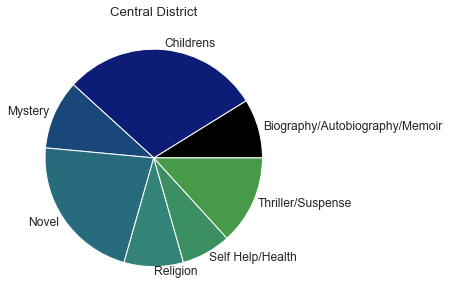

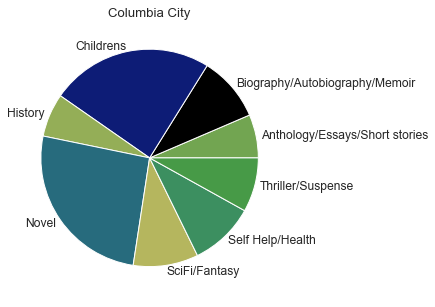

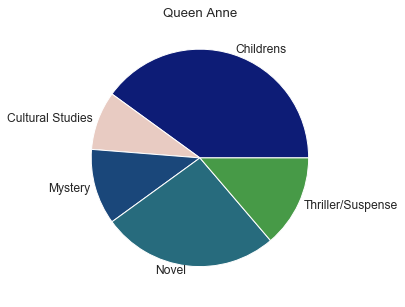

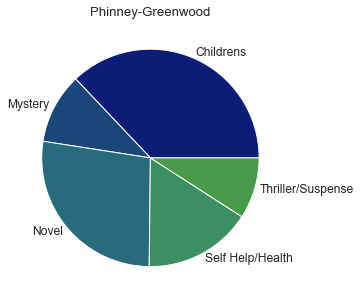

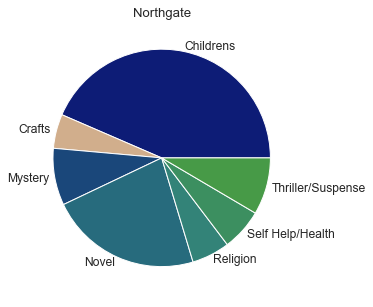

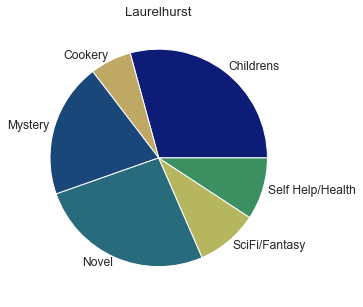

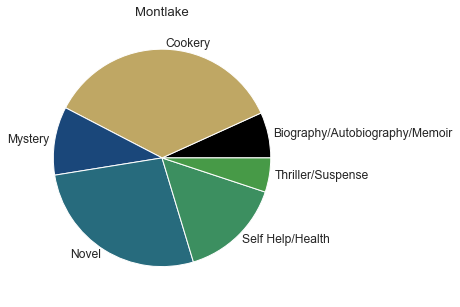

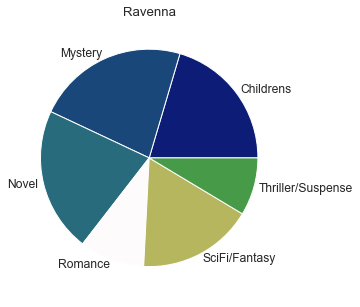

In [150]:
#There's got to be a way to put this all in a loop, but the function mypie assigns colors to the slices based on a dictionary so all colors by category are the same.

#https://stackoverflow.com/questions/35206282/assign-specific-colours-to-data-in-matplotlib-pie-chart
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

#This might be a simpler solution!: https://stackoverflow.com/questions/41787006/making-multiple-pie-charts-out-of-a-pandas-dataframe-one-for-each-row

hood='Central District'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood1='Columbia City'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood1]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood1

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood1]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood2='Queen Anne'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood2]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood2

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood2]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood3='Phinney-Greenwood'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood3]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood3

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood3]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood4='Northgate'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood4]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood4

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood4]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood5='Laurelhurst'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood5]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood5

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood5]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood6='Montlake'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood6]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood6

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood6]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

hood7='Ravenna'

def mypie(slices,labels,colors):

    colordict={}
    for l,c in zip(labels,colors):
        #print(l,c)
        colordict[l]=c

    fig = plt.figure()
    ax = fig.add_subplot(111)

    pie_wedge_collection = ax.pie(slices, labels=bkscatsum[bkscatsum['neighborhood']==hood7]['newcat'], labeldistance=1.05)#, autopct=make_autopct(slices))

    for pie_wedge in pie_wedge_collection[0]:
        pie_wedge.set_edgecolor('white')
        pie_wedge.set_facecolor(colordict[pie_wedge.get_label()])

    titlestring = hood7

    ax.set_title(titlestring)

    return fig,ax,pie_wedge_collection

slices = bkscatsum[bkscatsum['neighborhood']==hood7]['count']
fig,ax,pie_wedge_collection = mypie(slices,labels,colors)

plt.show()

## Language

In [78]:
bks.head()

,yrpub,count,neighborhood,collection,type,age,category1,category2,languages,originalLang
0,2018,1,Central District,CentralDistrict4,Fiction,Adult,Thriller/Suspense,Null,English,English
1,1991,1,Laurelhurst,Laurelhurst2,Fiction,Adult,Cultural Studies,Null,English,English
2,2019,1,Central District,CentralDistrict1,Nonfiction,Adult,Cultural Studies,Null,English,English
3,1992,1,Central District,CentralDistrict1,Fiction,Adult,Novel,Null,English,English
4,2007,1,Central District,CentralDistrict1,Fiction,Adult,Religion,Null,English,English


In [79]:
bks.originalLang.unique()

array(['English', nan, 'Akkadian', 'Latin', 'Swedish', 'Arabic', 'French',
       'Chinese', 'German', 'Spanish', 'Japanese', 'Thai', 'Undetermined'],
      dtype=object)

In [80]:
#Groups count by Neighborhood, collection, and type (fiction or non fiction), calculate percent
bkslang = bks.groupby(['languages'])['count'].sum().reset_index()
#bkslang['total'] = bksfiction.groupby('collection')['count'].transform('sum')
#bkslang['percent'] = bksfiction['count']/bksfiction['total']
bkslang

,languages,count
0,English,954
1,"English, Achinese",2
2,"English, French",2
3,"English, Italian",1
4,"English, Spanish",1
5,"English, Undetermined",2
6,French,2
7,German,1
8,"Hindi, English",1
9,Japanese,1
